predict Iris

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import matplotlib
import matplotlib.pyplot as pl

In [36]:
#get iris dataset from sklearn
iris = load_iris()

In [37]:
#detail
iris.keys()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
dfiris.describe().T  

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [45]:
#It is so important To make sure thats no Missing value, if thats some Missing value, do the missing value processing (imputer())

dfiris.isnull().sum(axis=0).sort_values(ascending=False)/float(len(dfiris))


petal width (cm)     0.0
petal length (cm)    0.0
sepal width (cm)     0.0
sepal length (cm)    0.0
dtype: float64

In [39]:
dfiris = pd.DataFrame(iris.data, columns=iris.feature_names)
dfiris.shape
dfiris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


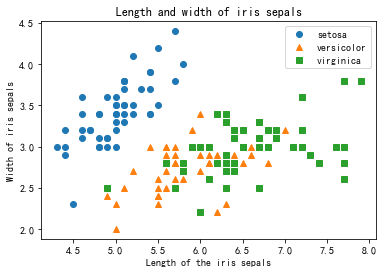

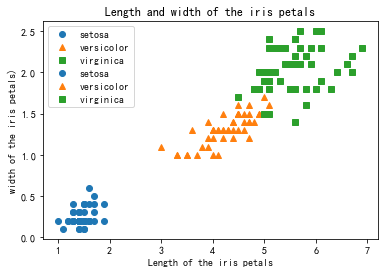

In [40]:
 #The length and width of the calyx/the length and width of the petal are visualized to determine whether the iris species can be identified based only on it.
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
 
style_list = ['o', '^', 's']       # Set different shapes of points, different shapes have different default colors, and can also be customized
data = iris.data
labels = iris.target_names
cc = defaultdict(list)
 
for i, d in enumerate(data):
    cc[labels[int(i/50)]].append(d)
 
p_list = []
c_list = []
 
for each in [0, 2]:
    for i, (c, ds) in enumerate(cc.items()):
        draw_data = np.array(ds)
        p = plt.plot(draw_data[:, each], draw_data[:, each+1], style_list[i])
        p_list.append(p)
        c_list.append(c)
 
    plt.legend(map(lambda x: x[0], p_list), c_list)
    plt.title('Length and width of the iris petals') if each else plt.title('Length and width of iris sepals')
    plt.xlabel('Length of the iris petals') if each else plt.xlabel('Length of the iris sepals')
    plt.ylabel('width of the iris petals)') if each else plt.ylabel('Width of iris sepals')
    plt.show()



In [47]:

#split training dataset and testing dataset
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=10)

In [46]:
#StandardScaler fit transf , transf different?
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)


In [43]:
#KNN ESTIMATOR
estimator = KNeighborsClassifier(n_neighbors=3)
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
#evalue model
#method 1 compare evalue value and real value
y_predict = estimator.predict(X_test)
print('y_predict:\n', y_predict)
print('compare evalue value and real value', y_test == y_predict)

#method 2 calculate the accuracy
score = estimator.score(X_test, y_test)
print('the accuracy is: \n', score)



y_predict:
 [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
compare evalue value and real value [ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
the accuracy is: 
 0.9736842105263158
